Data Preparation

Download the historial daily data of the entire 2018 for the 6 stocks

tks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk. https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 5 stocks.

You should have 6 csv files on your disk now. IBM.csv, MSFT.csv, etc. Each of the csv file should look like below (Your actual numbers may be different from below)

image.png
Retrieve the "Adj Close" column values as the daily prices of each stock

Please read the csv file, and retrieve the "Adj Close" column values and store them into Numpy 2D array. Conceptually the array has one dimension representing the 6 stocks and another dimension representing the price sequence of 2018.

In [37]:
# data preparation

import pandas as pd

company_names = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']
price_sequences = []

# as i see, data provided link is redirecting to 2022 - 2023 time range

for data in company_names:
    file_path = f"C://Users//srikr//Downloads//{data}.csv"
    df_list = pd.read_csv(file_path)
    adj_close = df_list['Adj Close'].values
    price_sequences.append(adj_close)

for i, company in enumerate(company_names):
    print(f'{company} Adj Close prices:')
    print(price_sequences[i])

IBM Adj Close prices:
[121.597435 122.321053 123.006592 124.40625  121.159439 121.578392
 119.483688 121.17849  121.616478 120.254929 118.950493 119.312309
 116.836754 116.170258 115.913177 116.884354 115.808434 113.123413
 115.694191 119.493217 119.721725 116.379723 113.132935 112.114151
 112.161758 111.942757 115.960785 114.29454  115.703697 117.055733
 116.646317 122.159195 123.682602 126.339081 126.567596 128.548035
 128.319534 131.880493 131.671036 131.585342 130.28093  128.033875
 130.404709 131.718643 133.337296 132.373779 136.073593 137.942764
 138.935165 139.070053 139.243469 140.756149 142.249557 141.324615
 143.65625  143.319046 142.952911 140.84285  141.141556 143.463547
 143.714081 143.241959 142.027954 142.114685 141.893082 142.384445
 141.681122 143.762238 145.072586 144.388504 137.162338 135.042664
 133.799759 136.12178  136.950378 135.736374 136.478256 137.220139
 134.907776 135.90979  135.746002 136.381912 137.39357  135.957977
 138.453415 138.308899 139.51326  139.95

In [56]:
import numpy as np

stock_data = np.array(price_sequences)
stock_data

array([[121.597435, 122.321053, 123.006592, ..., 148.130005, 148.059998,
        147.520004],
       [256.046387, 261.929535, 264.098602, ..., 332.880005, 329.910004,
        334.269989],
       [109.419998, 111.779999, 111.870003, ..., 135.369995, 136.199997,
        137.199997],
       [153.549088, 156.441925, 162.466171, ..., 182.910004, 177.559998,
        178.179993],
       [129.820007, 133.270004, 136.449997, ..., 135.360001, 137.850006,
        138.229996],
       [162.059998, 169.149994, 168.960007, ..., 299.170013, 298.670013,
        297.890015]])

In [57]:
stock_data.shape

# shape of the matrix is perfect, no need to perform data cleaning
# 6 is representing the company 
# 252 is representing extracted price sequence data of 2022 - 2023 from the link

(6, 252)

Plot the daily price curve for each stock. So you will have 6 plots.

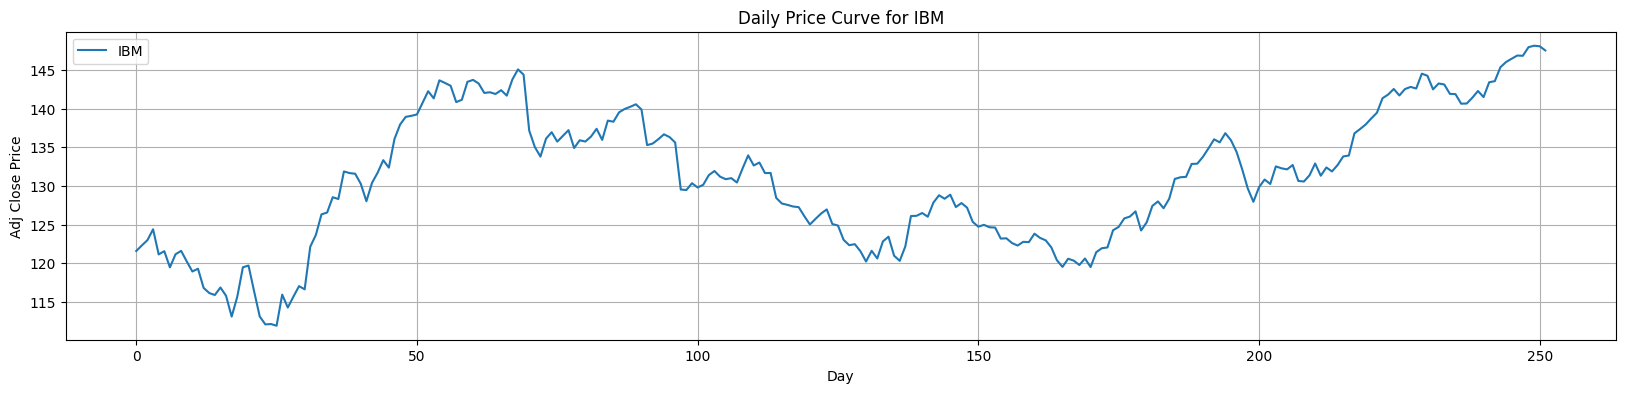

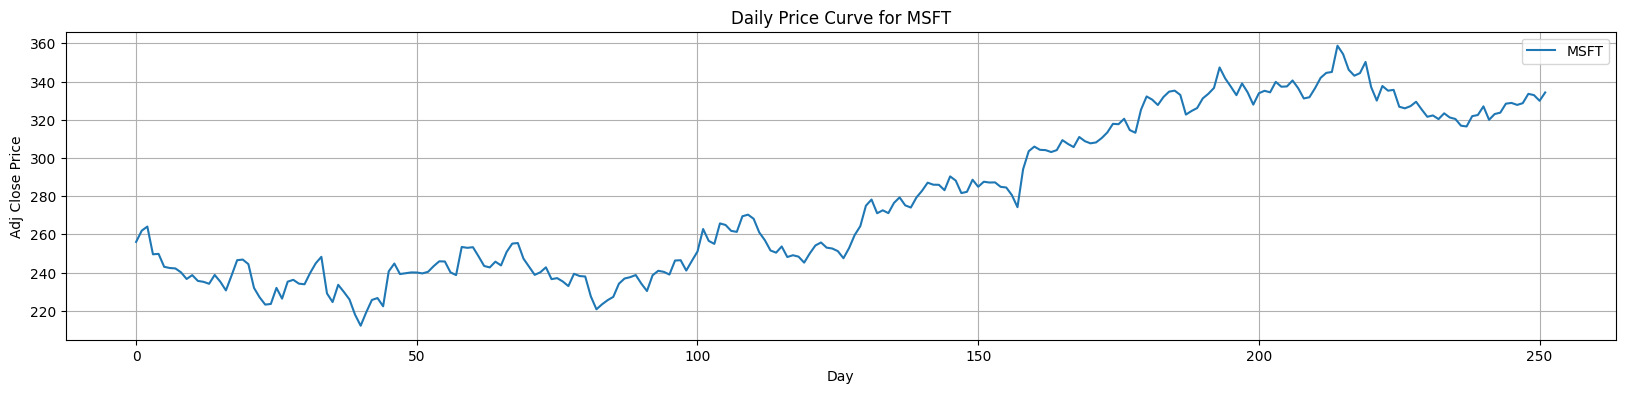

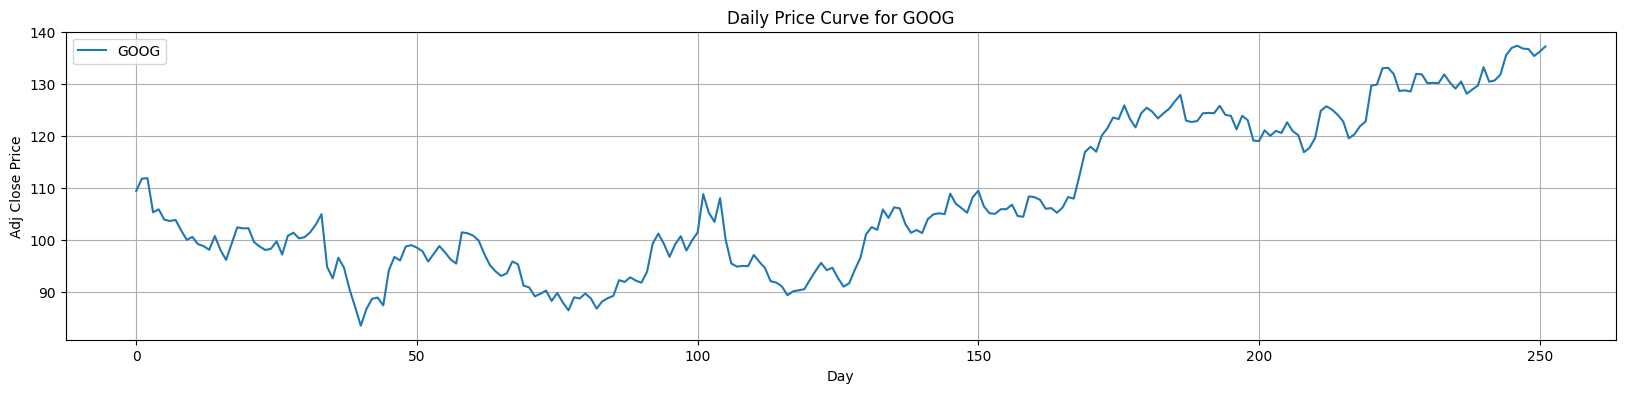

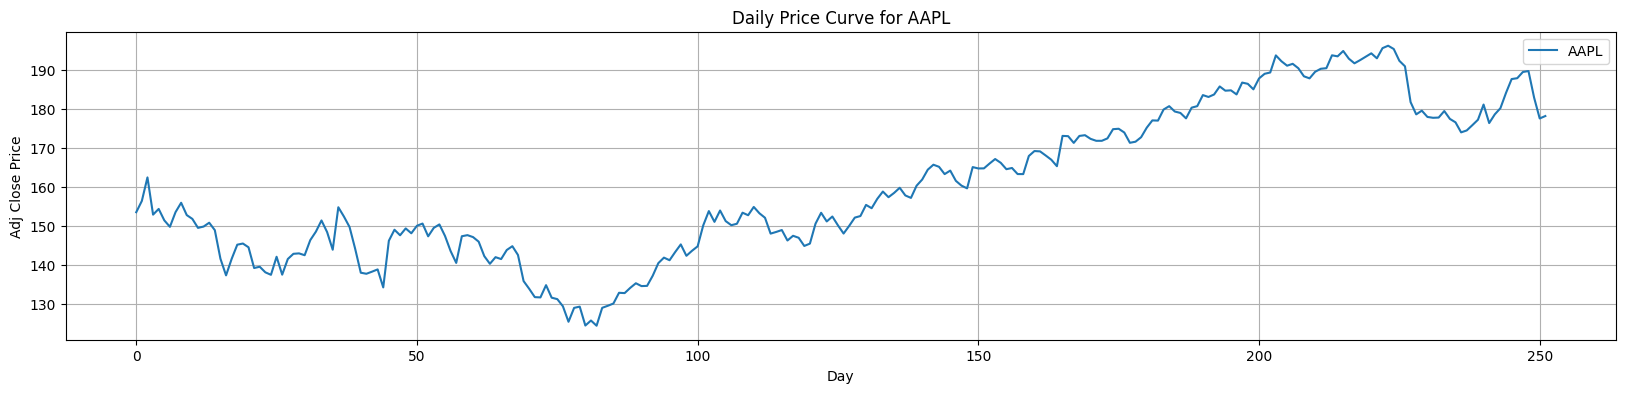

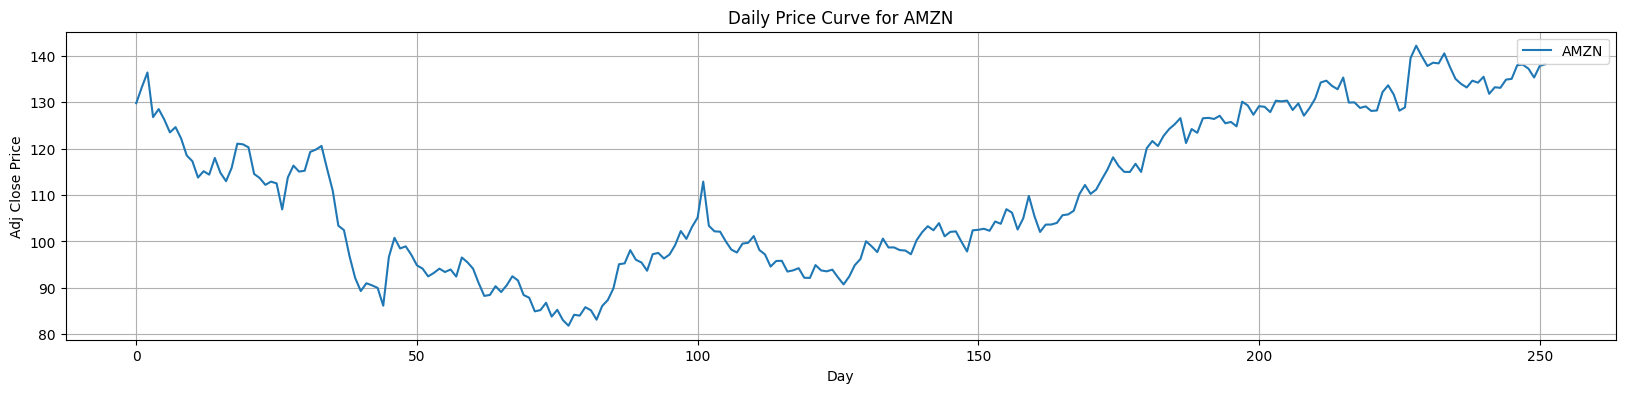

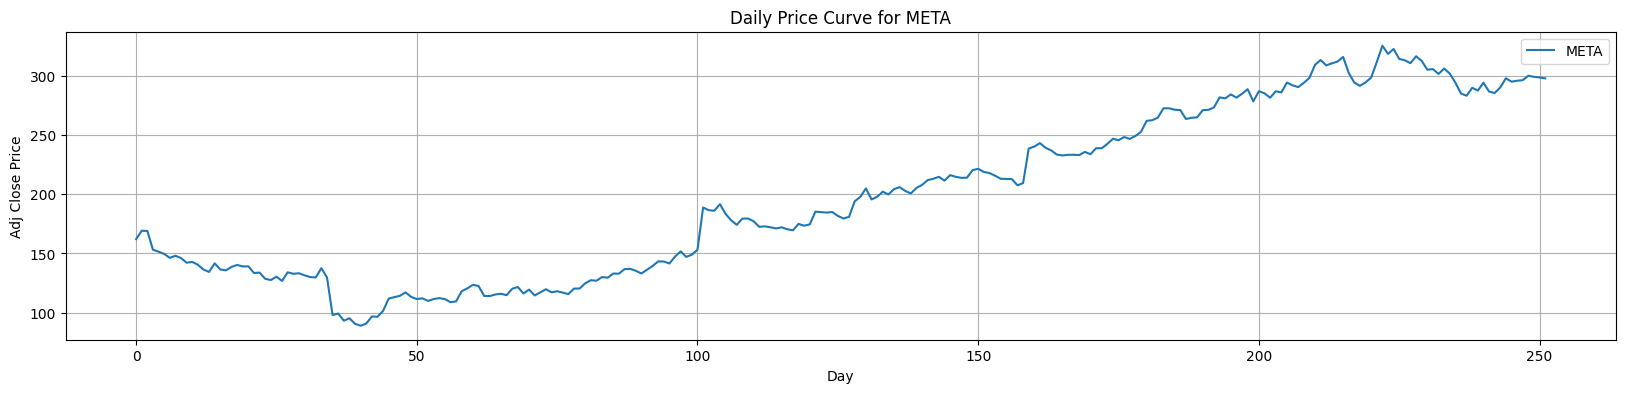

In [69]:
# Plotting

import matplotlib.pyplot as plt

for i, company in enumerate(company_names):
    plt.figure(figsize=(20, 4))  
    plt.plot(stock_data[i], label=company)
    plt.xlabel('Day')
    plt.ylabel('Adj Close Price')
    plt.title(f'Daily Price Curve for {company}')
    plt.legend()
    plt.grid(True)

plt.show()

Compute the correlation between any two stocks.

Requirements: Please do NOT use any library API to compute correlation. You should use the above formula to implement the correlation algorithm using Numpy. You should not use any type of loops in this function.

Find the two most correlated stocks.
The sample correlation coefficient formula is Σ(xi−¯x)(yi−¯y)/√Σ(xi−¯x)2∑(yi−¯y)2

where 𝑥 and 𝑦 are the sample means of [𝑥1,𝑥2,...,𝑥𝑛] and [𝑦1,𝑦2,...,𝑦𝑛]

In [76]:
def correlation_coefficient(x, y):

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))

    x_denominator = np.sqrt(np.sum((x - x_mean)**2))
    y_denominator = np.sqrt(np.sum((y - y_mean)**2))

    correlation_coefficient = numerator / (x_denominator * y_denominator)

    return correlation_coefficient

In [89]:
IBM = stock_data[0]
MSFT = stock_data[1]
GOOG = stock_data[2]
AAPL = stock_data[3]
AMZN = stock_data[4]
META = stock_data[5]

In [113]:
stock_names = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META']

num_stocks = len(stock_names)

correlation_coefficients = {}

for i in range(num_stocks):
    print(i)
    for j in range(i + 1, num_stocks):
        print(j)
        stock1 = stock_data[i]
        print(stock1)
        stock2 = stock_data[j]
        print(stock2)

        correlation = correlation_coefficient(stock1, stock2)

        stock_pair = f"{stock_names[i]}:{stock_names[j]}"
        print(stock_pair)
        correlation_coefficients[stock_pair] = correlation


0
1
[121.597435 122.321053 123.006592 124.40625  121.159439 121.578392
 119.483688 121.17849  121.616478 120.254929 118.950493 119.312309
 116.836754 116.170258 115.913177 116.884354 115.808434 113.123413
 115.694191 119.493217 119.721725 116.379723 113.132935 112.114151
 112.161758 111.942757 115.960785 114.29454  115.703697 117.055733
 116.646317 122.159195 123.682602 126.339081 126.567596 128.548035
 128.319534 131.880493 131.671036 131.585342 130.28093  128.033875
 130.404709 131.718643 133.337296 132.373779 136.073593 137.942764
 138.935165 139.070053 139.243469 140.756149 142.249557 141.324615
 143.65625  143.319046 142.952911 140.84285  141.141556 143.463547
 143.714081 143.241959 142.027954 142.114685 141.893082 142.384445
 141.681122 143.762238 145.072586 144.388504 137.162338 135.042664
 133.799759 136.12178  136.950378 135.736374 136.478256 137.220139
 134.907776 135.90979  135.746002 136.381912 137.39357  135.957977
 138.453415 138.308899 139.51326  139.956451 140.23587  14

In [114]:
for pair, correlation in correlation_coefficients.items():
    print(f'Correlation coefficient for {pair}: {correlation}')

Correlation coefficient for IBM:MSFT: 0.2416567263998994
Correlation coefficient for IBM:GOOG: 0.28271899039753895
Correlation coefficient for IBM:AAPL: 0.18013149510138332
Correlation coefficient for IBM:AMZN: 0.09338558442960117
Correlation coefficient for IBM:META: 0.2076486144643931
Correlation coefficient for MSFT:GOOG: 0.9121646213618226
Correlation coefficient for MSFT:AAPL: 0.9606698684455992
Correlation coefficient for MSFT:AMZN: 0.7423365148048724
Correlation coefficient for MSFT:META: 0.9681139599416506
Correlation coefficient for GOOG:AAPL: 0.908624185297557
Correlation coefficient for GOOG:AMZN: 0.886364997603335
Correlation coefficient for GOOG:META: 0.9111770944489764
Correlation coefficient for AAPL:AMZN: 0.802152781438111
Correlation coefficient for AAPL:META: 0.9423967049704092
Correlation coefficient for AMZN:META: 0.7718306036525173


Conclusion

Print all stock pairs and their correlations from max to min. The format should look like below (numbers here are not the actual values),

IBM:MSFT = 0.763
IBM:GOOG = 0.627
...
AMZN:META = 0.234

Tips: By definition, the correlation is symmetrical, i.e., r_xy = r_yx, so when you have IBM:MSFT, you can skip MSFT:IBM.

In [118]:
# Result
sorted_correlations = dict(sorted(correlation_coefficients.items(), key=lambda x: x[1], reverse=True))
sorted_correlations

{'MSFT:META': 0.9681139599416506,
 'MSFT:AAPL': 0.9606698684455992,
 'AAPL:META': 0.9423967049704092,
 'MSFT:GOOG': 0.9121646213618226,
 'GOOG:META': 0.9111770944489764,
 'GOOG:AAPL': 0.908624185297557,
 'GOOG:AMZN': 0.886364997603335,
 'AAPL:AMZN': 0.802152781438111,
 'AMZN:META': 0.7718306036525173,
 'MSFT:AMZN': 0.7423365148048724,
 'IBM:GOOG': 0.28271899039753895,
 'IBM:MSFT': 0.2416567263998994,
 'IBM:META': 0.2076486144643931,
 'IBM:AAPL': 0.18013149510138332,
 'IBM:AMZN': 0.09338558442960117}

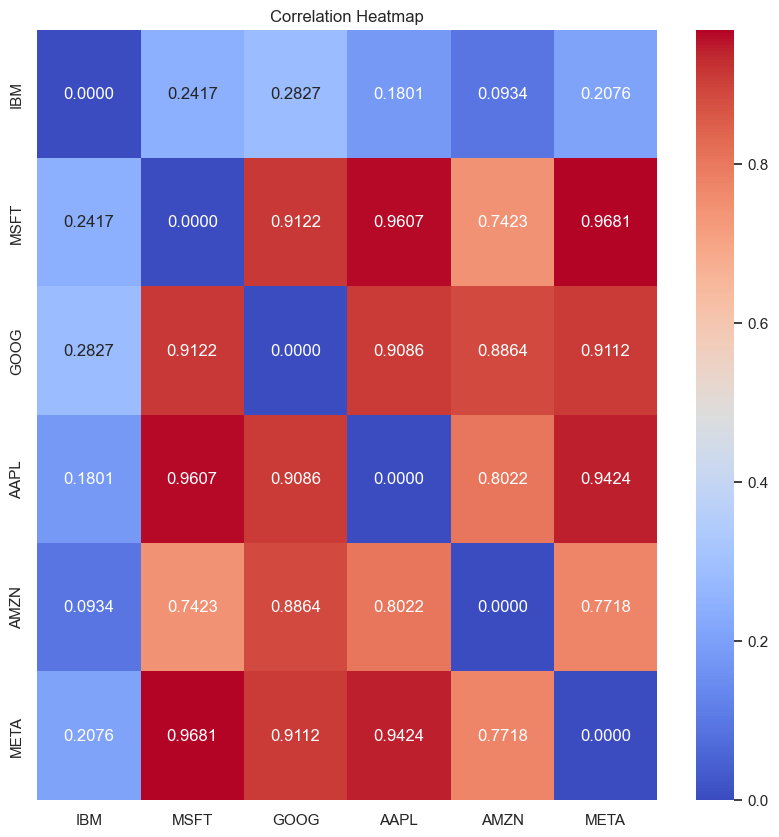

In [126]:
import seaborn as sns

correlation_matrix = np.zeros((num_stocks, num_stocks))

for i in range(num_stocks):
    for j in range(i + 1, num_stocks):
        stock1 = stock_data[i]
        stock2 = stock_data[j]

        correlation = correlation_coefficient(stock1, stock2)

        correlation_matrix[i, j] = correlation
        correlation_matrix[j, i] = correlation

plt.figure(figsize=(10, 10))
sns.set(font_scale=1.0)
sns.heatmap(correlation_matrix, annot=True, xticklabels=stock_names, yticklabels=stock_names, cmap="coolwarm", fmt=".4f")
plt.title("Correlation Heatmap")
plt.show()

RESULT 

{'MSFT:META': 0.9681139599416506,
 'MSFT:AAPL': 0.9606698684455992,
 'AAPL:META': 0.9423967049704092,
 'MSFT:GOOG': 0.9121646213618226,
 'GOOG:META': 0.9111770944489764,
 'GOOG:AAPL': 0.908624185297557,
 'GOOG:AMZN': 0.886364997603335,
 'AAPL:AMZN': 0.802152781438111,
 'AMZN:META': 0.7718306036525173,
 'MSFT:AMZN': 0.7423365148048724,
 'IBM:GOOG': 0.28271899039753895,
 'IBM:MSFT': 0.2416567263998994,
 'IBM:META': 0.2076486144643931,
 'IBM:AAPL': 0.18013149510138332,
 'IBM:AMZN': 0.09338558442960117}